# Week 5: Fairness & Interpretability

---

### **Resources:** Fairness in ML
    
**[Social Determinants of Health | WHO](https://www.who.int/health-topics/social-determinants-of-health#tab=tab_1)**

**[How I'm fighting bias in algorithms | Joy Buolamwini](https://www.ted.com/talks/joy_buolamwini_how_i_m_fighting_bias_in_algorithms?language=en)**

**[How To Stop Artificial Intelligence From Marginalizing Communities? | Timnit Gebru](https://www.youtube.com/watch?v=PWCtoVt1CJM)**

**[ Inclusive ML guide - AutoML | Google](https://cloud.google.com/inclusive-ml#section-1)**

### **Resources:** Interpretability

**[Intro to concepts/types of interpretability](https://www.youtube.com/watch?v=OZJ1IgSgP9E)**

**[SHAP](https://www.youtube.com/watch?v=9haIOplEIGM)**


---

### Questions from the resources


1. **What is the goal of "fairness" in machine learning?**

- [ ] To "reduce the sensitivity of our model while trying to improve our ability to generalize prediction accuracy to a hold-out test set, this may include cases in which the model has not encountered before"
- [ ] To "remove 
- [x] To "prevent machine learning algorithms from perpetuating the marginalization or discrimination of persons based on income, sexual orientation, race, gender identity, or religion"

2. **Can machine learning perpetuate biases and/or create health disparities?**

- [ ] No, only people can perpetuate biases
- [ ] Yes, models can, and do perpetuate biases to create health disparities
- [ ] No, the models only goal is to minimize a cost function
- [x] Yes, but primarily by way of biases embedded in the data or model/feature design

3. **Which of the following situations may perpetuate biases?**

- [x] Automated algorithms to approve loan requests using demographic and income features
- [x] An algorithm to identify melanoma's from pictures that reports poor accuracy for darker skin tones
- [ ] An algorithm to identify email scams
- [ ] An algorithm that predicts if a person does or does not have a house pet
- [x] A diagnostic prediction algorithm for early cancer detection that only works for a single acenstral group
- [x] Automated algorithms to approve, deny, and set bail

4. **Joy Buolamwini's *Inclusive Coding* discusses,**

- [ ] Who, when, and where we code matters when fighting bias in ML
- [x] Who, how, and why we code matters when fighting bias in ML
- [ ] Why development teams should create oversight committees
- [ ] How for profit lead AI development often results in biases

5. **Timnit Gebru advocates for the use of,**

- [ ] Oversight committees that meet to discuss issues surrounding bias in AI
- [x] Datasheets for datasets that discuss recommended usage and standards for using the dataset
- [ ] A novel word embedding algorithm that removes inherent biases 
- [ ] A checklist of tools and resources that researchers creating facial recognition software should run through before deployment


# Coding Exercises

### For these exercises, we are going to be using `synthetic` data

### This data is not real and was designed to highlight `potential challenges` in datasets and analyses

In [228]:

import numpy as np
import pandas as pd
import os 
from tqdm import tqdm

import shap; shap.initjs()

from sklearn.datasets import make_classification 
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
import seaborn as sns

from importlib import reload
import week_5_helperFx as fx; reload(fx)


<module 'week_5_helperFx' from '/home/jovyan/week_5_helperFx.py'>


## Question 1: Underrepresentation

In this problem we are going to be building a penalized logisitic regression model (`L1 Penalty`) to predict Major Depressive Disorder (MDD)

**Your task**,

- Run the code to get train/test accuracy, how does the model do?
- After you run this, 
    - add code, where specified, to create a test sets that are stratified by sex,
    - uncomment associated lines to store and print accuracy stratified by sex
    
**How well does this model do by sex?**

In [185]:

# Number of males/females in our dataset
m_n, f_n = 10000, 500

# Store performance
tr_acc, te_acc, m_te_acc, f_te_acc = [], [], [], []

# Train a couple times (synthetic data performance can vary)
num_iter = 10


for ii in tqdm(range(num_iter)):
    
    # Generate synthetic data
    dat = fx.Create_MDD(m_n, f_n)
    X, y = dat.X, dat.y

    # Create splits
    kf = KFold(n_splits=5)
    
    # Train/eval for each fold
    for tr_idx, te_idx in kf.split(y):
        
        # Split train/test
        tr_x, te_x =  X.iloc[tr_idx, :], X.iloc[te_idx, :]
        tr_y, te_y =  y.iloc[tr_idx], y.iloc[te_idx]

        # Fit our model
        logl1 = LogisticRegression(penalty='l1', solver='liblinear')
        logl1.fit(tr_x, tr_y)
        
        # Get our predictions
        tr_pred = logl1.predict(tr_x)
        te_pred = logl1.predict(te_x)
        
        # Get accuracy
        tr_acc.append(accuracy_score(tr_y, tr_pred))
        te_acc.append(accuracy_score(te_y, te_pred))
        
        
        '''#################################################
        # Split test into M/F only and evaluate performance
        #################################################'''
        
        # Stratify test set by sex
            # YOU CODE HERE

        # Get our predictions
        #te_pred_m = logl1.predict(_)
        #te_pred_f = logl1.predict(_)

        # Get accuracy
        #m_te_acc.append(accuracy_score(_, _))
        #f_te_acc.append(accuracy_score(_, _))


print(f'Train Acc: {np.mean(np.array(tr_acc)):.3f} '
      f'Test Acc: {np.mean(np.array(te_acc)):.3f} ')
      #f'Test Acc Male: {np.mean(np.array(m_te_acc)):.3f} '
      #f'Test Acc Female: {np.mean(np.array(f_te_acc)):.3f}')


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  4.56it/s]

Train Acc: 0.975 Test Acc: 0.974 


In [186]:

'''###############################################
Solution
###############################################'''

# Number of males/females in our dataset
m_n = 10000
f_n = 500

# Store performance
tr_acc, te_acc, m_te_acc, f_te_acc = [], [], [], []


# Train a couple times (synthetic data performance can vary)
num_iter = 10

for ii in tqdm(range(num_iter)):
    
    # Generate synthetic data
    dat = fx.Create_MDD(m_n, f_n)
    X, y = dat.X, dat.y

    # Create splits
    kf = KFold(n_splits=5)
    
    # Train/eval for each fold
    for tr_idx, te_idx in kf.split(y):
        
        # Split train/test
        tr_x, te_x =  X.iloc[tr_idx, :], X.iloc[te_idx, :]
        tr_y, te_y =  y.iloc[tr_idx], y.iloc[te_idx]

        # Fit our model
        logl1 = LogisticRegression(penalty='l1', solver='liblinear')
        logl1.fit(tr_x, tr_y)
                
        # Get our predictions
        tr_pred = logl1.predict(tr_x)
        te_pred = logl1.predict(te_x)
        
        # Get accuracy
        tr_acc.append(accuracy_score(tr_y, tr_pred))
        te_acc.append(accuracy_score(te_y, te_pred))
        
        
        '''#################################################
        # Split test into M/F only and evaluate performance
        #################################################'''
        
        # Stratify test set by sex
        m_te_x = te_x[te_x['sex'] == 0]
        m_te_y = te_y[te_x['sex'] == 0]
        f_te_x = te_x[te_x['sex'] == 1]
        f_te_y = te_y[te_x['sex'] == 1]

        # Get our predictions
        te_pred_m = logl1.predict(m_te_x)
        te_pred_f = logl1.predict(f_te_x)

        # Get accuracy
        m_te_acc.append(accuracy_score(m_te_y, te_pred_m))
        f_te_acc.append(accuracy_score(f_te_y, te_pred_f))


print(f'Train Acc: {np.mean(np.array(tr_acc)):.3f} '
      f'Test Acc: {np.mean(np.array(te_acc)):.3f} '
      f'Test Acc Male: {np.mean(np.array(m_te_acc)):.3f} '
      f'Test Acc Female: {np.mean(np.array(f_te_acc)):.3f}')


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  3.72it/s]

Train Acc: 0.976 Test Acc: 0.975 Test Acc Male: 0.985 Test Acc Female: 0.766


## Visualize accuracy, by sex, as a function of composition (might take a few minutes to run)

**You don't need to code anything here, just run the cells and visualize the output for the questions**

**Here we can plot,**

    1. Total performance
    2. Male performance
    3. Female performance
    

### Questions

6. **How does our performance vary as a function of composition of M/F?**

7. **Is this something we would have caught just viewing *total* accuracy?**

8. **Might this create health disparities? How?**


In [188]:

# Range of splits we'll try
x = np.arange(.05, .75, .025)

# Total number of subjects
n = 2000

# Create overarching arrays to store performance
perf = np.zeros(x.shape)
m_perf = np.zeros(x.shape)
f_perf = np.zeros(x.shape)

# Loop through all ranges of x
for ind, p in enumerate(tqdm(x)):
    
    # Composition of dataset
    m_n = int(n * (1 - p))
    f_n = int(n * p)

    # Store performance
    te_acc, m_te_acc, f_te_acc = [], [], []

    # Train a couple times (synthetic data performance can vary)=
    for ii in range(20):

        # Generate data
        dat = fx.Create_MDD(m_n, f_n)
        X, y = dat.X, dat.y

        # Create splits
        kf = KFold(n_splits=5)

        # Train/eval for each fold
        for tr_idx, te_idx in kf.split(y):
            
            # Split train/test
            tr_x, te_x =  X.iloc[tr_idx, :], X.iloc[te_idx, :]
            tr_y, te_y =  y.iloc[tr_idx], y.iloc[te_idx]

            # Fit our model
            logl1 = LogisticRegression(penalty='l1', solver='liblinear')
            logl1.fit(tr_x, tr_y)

            # Get our predictions
            te_pred = logl1.predict(te_x)

            # Get accuracy
            te_acc.append(accuracy_score(te_y, te_pred))

            
            '''#################################################
            # Split test into M/F only and evaluate performance
            #################################################'''

            # Stratify test set by sex
            m_te_x = te_x[te_x['sex'] == 0]
            m_te_y = te_y[te_x['sex'] == 0]
            f_te_x = te_x[te_x['sex'] == 1]
            f_te_y = te_y[te_x['sex'] == 1]

            # Get our predictions
            te_pred_m = logl1.predict(m_te_x)
            te_pred_f = logl1.predict(f_te_x)
            
            m_te_acc.append(accuracy_score(m_te_y, te_pred_m))
            f_te_acc.append(accuracy_score(f_te_y, te_pred_f))

    # Store performance
    perf[ind] = np.mean(np.array(te_acc))
    m_perf[ind] = np.mean(np.array(m_te_acc))
    f_perf[ind] = np.mean(np.array(f_te_acc))

    
# Plot the results
fig, ax = plt.subplots(figsize = (12, 8))

# For each model
ax.plot(x, perf, color = 'green', label = 'Total Acc')
ax.plot(x, m_perf, color = 'red', label = 'M Acc')
ax.plot(x, f_perf, color = 'blue', label = 'F Acc')
ax.scatter(x, perf, color = 'green')
ax.scatter(x, m_perf, color = 'red')
ax.scatter(x, f_perf, color = 'blue')

ax.set_title('Underrepresentation')
ax.set_xlabel('Percent F')
ax.set_ylabel('Accuracy')
ax.legend()
plt.show()


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 28/28 [00:48<00:00,  1.73s/it]


## Question 2: Missing Context

Let's say we are interested in predicting diagnoses of Generalized Anxiety Disorder (GAD)

**Your task**,

- Run the code to get train/test accuracy, how does the model do?
    

In [233]:

# Generate the data from the helper fx
dataset = fx.Create_GAD()
dataset.to_dframe()

# Store performance
tr_acc, te_acc = [], []

# Split X, y
y = dataset.df['g_anxd']
X = dataset.df.drop(['g_anxd', 'x'], axis = 1)

# Create splits
kf = KFold(n_splits=5)

# Train/eval for each fold
for tr_idx, te_idx in kf.split(y):
    
    # Split train/test
    tr_x, te_x =  X.iloc[tr_idx, :], X.iloc[te_idx, :]
    tr_y, te_y =  y.iloc[tr_idx], y.iloc[te_idx]

    # Fit our model
    logl1 = LogisticRegression(solver='liblinear')# penalty='l1', 
    logl1.fit(tr_x, tr_y)

    # Get our predictions
    tr_pred = logl1.predict(tr_x)
    te_pred = logl1.predict(te_x)

    tr_p = logl1.predict_log_proba(tr_x)
    tr_logg_odds = tr_p[:,1] - tr_p[:,0]
    
    # Get accuracy
    tr_acc.append(accuracy_score(tr_y, tr_pred))
    te_acc.append(accuracy_score(te_y, te_pred))

print(f'Train Acc: {np.mean(np.array(tr_acc)):.3f} Test Acc: {np.mean(np.array(te_acc)):.3f}')


Train Acc: 0.774 Test Acc: 0.775


## SHAP

Today we will be using the [SHAP library](https://shap.readthedocs.io/en/latest/example_notebooks/overviews/An%20introduction%20to%20explainable%20AI%20with%20Shapley%20values.html#)

$$
\phi_{i}=\beta_{i} \cdot\left(x_{i}-E\left[x_{i}\right]\right)
$$



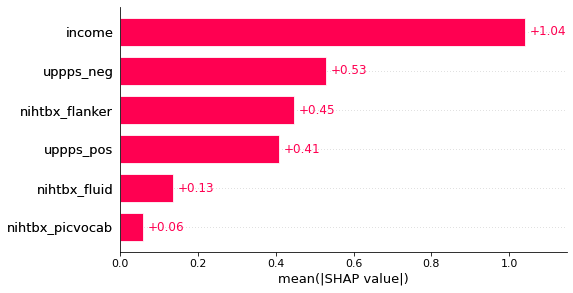

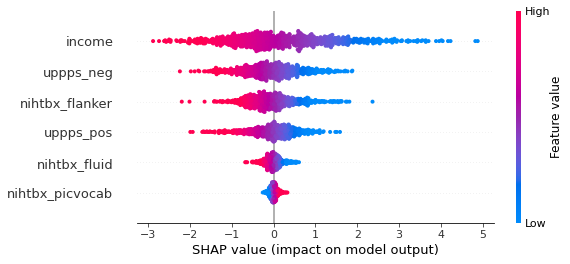

In [234]:

explainer = shap.LinearExplainer(logl1, tr_x)
shap_values = explainer(tr_x)

shap.plots.bar(shap_values.abs.mean(0))
shap.plots.beeswarm(shap_values)


## Create our data to predict GAD

**Add the missing context variables**

Run the model, which features emerge as most important?

Train Acc: 0.989 Test Acc: 0.987


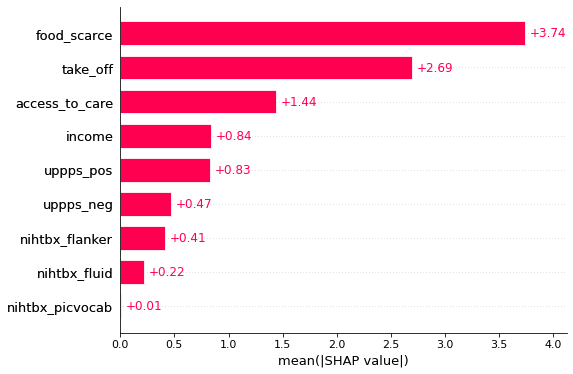

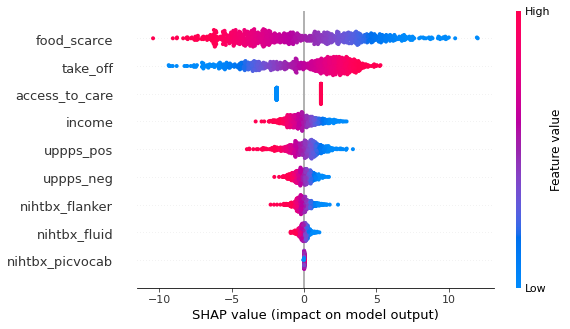

In [235]:
dataset = fx.Create_GAD()
dataset.add_context()

# Store performance
tr_acc, te_acc = [], []

y = dataset.df['g_anxd']
X = dataset.df.drop(['g_anxd', 'x'], axis = 1)

# Create splits
kf = KFold(n_splits=5)

# Train/eval for each fold
for tr_idx, te_idx in kf.split(y):
    
    # Split train/test
    tr_x, te_x =  X.iloc[tr_idx, :], X.iloc[te_idx, :]
    tr_y, te_y =  y.iloc[tr_idx], y.iloc[te_idx]

    # Fit our model
    logl1 = LogisticRegression(penalty='l1', solver='liblinear')
    logl1.fit(tr_x, tr_y)

    # Get our predictions
    tr_pred = logl1.predict(tr_x)
    te_pred = logl1.predict(te_x)

    # Get accuracy
    tr_acc.append(accuracy_score(tr_y, tr_pred))
    te_acc.append(accuracy_score(te_y, te_pred))

print(f'Train Acc: {np.mean(np.array(tr_acc)):.3f} Test Acc: {np.mean(np.array(te_acc)):.3f}')

# explain the GAM model with SHAP
explainer = shap.LinearExplainer(logl1, tr_x)
shap_values = explainer(tr_x)

shap.plots.bar(shap_values.abs.mean(0))
shap.plots.beeswarm(shap_values)


In [236]:

from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

'''###############################################
Solution
###############################################'''

# Create the data if it doesnt exist
if not os.path.isfile('depression_data.csv'):
    create_depression_data()

# Load the data and SHUFFLE it
df = pd.read_csv('depression_data.csv')
df = df.sample(frac = 1)

y = df['depression']#.to_numpy()
X = df.drop(columns = 'depression')#.to_numpy()

print(f'{X.shape} {y.shape}')

kf = KFold(n_splits=5)

for train_index, test_index in kf.split(y):

    # Split train/test
    tr_x, te_x =  X.iloc[train_index, :], X.iloc[test_index, :]
    tr_y, te_y =  y.iloc[train_index], y.iloc[test_index]
    
    # Fit our model
    logl1 = LogisticRegression(penalty='l1', solver='liblinear')
    logl1.fit(tr_x, tr_y)

    # Get our predictions
    train_pred = logl1.predict(tr_x)
    test_pred = logl1.predict(te_x)
    
    # Get accuracy
    train_acc = accuracy_score(tr_y, train_pred)
    test_acc = accuracy_score(te_y, test_pred)
    
    # Stratify test set by sex
    male_te_x = te_x[te_x['sex'] == 0]
    male_te_y = te_y[te_x['sex'] == 0]
    female_te_x = te_x[te_x['sex'] == 1]
    female_te_y = te_y[te_x['sex'] == 1]

    # Get our predictions
    test_pred_male = logl1.predict(male_te_x)
    test_pred_female = logl1.predict(female_te_x)

    # Get accuracy
    test_acc_male = accuracy_score(male_te_y, test_pred_male)
    test_acc_female = accuracy_score(female_te_y, test_pred_female)

    print(f'Train Acc: {train_acc:.3f} Test Acc: {test_acc:.3f} Test Acc Male: {test_acc_male:.3f} Test Acc Female: {test_acc_female:.3f}')



(1100, 10) (1100,)
Train Acc: 0.893 Test Acc: 0.895 Test Acc Male: 1.000 Test Acc Female: 0.652
Train Acc: 0.890 Test Acc: 0.918 Test Acc Male: 1.000 Test Acc Female: 0.690
Train Acc: 0.906 Test Acc: 0.855 Test Acc Male: 0.993 Test Acc Female: 0.537
Train Acc: 0.901 Test Acc: 0.868 Test Acc Male: 0.994 Test Acc Female: 0.525
Train Acc: 0.902 Test Acc: 0.909 Test Acc Male: 0.988 Test Acc Female: 0.640


Bias in mental health risk factors 

- Generate some random data 

Outcome: Depression (0, 1)

Features:
    - fluid_int
    
   
Real Features:
    - Worry about access to food
    - discrimination
    - access to health services
    - could care giver readily take a day off
    -



In [ ]:

    # Gender
#     df['gender'] = df['g_anxd'].copy()
#     f_inds = np.where(df['gender'] == 1)[0]
#     m_inds = np.where(df['gender'] == 0)[0]
    
#     # Create Gender
#     rand_inds_m = np.random.choice(m_inds, 125, replace = False)
#     rand_inds_f = np.random.choice(f_inds, 25, replace = False)
#     df['g_anxd'][rand_inds_m] = np.abs(df['gender'][rand_inds_m] - 1)
#     df['g_anxd'][rand_inds_f] = np.abs(df['gender'][rand_inds_f] - 1)

#     df['harrassment'] = df['g_anxd'].copy()
#     rand_inds_m = np.random.choice(m_inds, 250, replace = False)
#     rand_inds_f = np.random.choice(f_inds, 25, replace = False)
#     df['harrassment'][rand_inds_m] = np.abs(df['gender'][rand_inds_m] - 1)
#     df['harrassment'][rand_inds_f] = np.abs(df['gender'][rand_inds_f] - 1)
    
    
    
    # Sexual discrimination
    #df['gender'] = df['g_anxd'].copy()
    #f_inds = np.where(df['gender'] == 1)[0]; print(f_inds.shape)
    #m_inds = np.where(df['gender'] == 0)[0]; print(m_inds.shape)
    #rand_inds = np.random.choice(np.arange(n), 250, replace = False)
    #df['gender'][rand_inds] = np.abs(df['gender'][rand_inds] - 1)
    
    #df['take_off'] = (df['x'] * np.random.rand(n) + np.random.rand(n)) * 1e6
    #df['discrimination'] = (df['x'] * np.random.rand(n) + np.random.rand(n)) * 1e6
    #df['income'] = (df['x'] * np.random.rand(n) + np.random.rand(n)) * 1e6

    # return pd.DataFrame(df)

#     # Generate data for males
#     male_x, male_y = make_classification(n_samples=n_male, n_features=9, n_informative=6, n_redundant=0, 
#                                          n_repeated=0, n_classes=2, n_clusters_per_class=1, class_sep = 3)

#     # Generate data for females
#     female_x, female_y = make_classification(n_samples=n_female, n_features=9, n_informative=2, n_redundant=0, 
#                                              n_repeated=0, n_classes=2, n_clusters_per_class=1, class_sep = .5)

#     # Stack and reshape
#     male_x = np.hstack((male_x, np.zeros((n_male, 1)), male_y.reshape(male_y.shape[0], 1)))
#     female_x = np.hstack((female_x, np.ones((n_female, 1)), female_y.reshape(female_y.shape[0], 1)))

#     # Combine male and female
#     X = np.concatenate((male_x, female_x))

#     # Convert to dataframe
#     df = pd.DataFrame(data = X)

#     # Column names
#     df.columns = ['nihtbx_picvocab', 'nihtbx_flanker', 'nihtbx_list', 'nihtbx_cardsort', 
#                   'nihtbx_pattern', 'nihtbx_picture', 'nihtbx_reading', 'nihtbx_fluidcomp',
#                   'nihtbx_cryst', 'sex', 'depression']
    
#     # Shuffle rows
#     df = df.sample(frac = 1)

#     # Get y and x
#     y = df['depression']
#     X = df.drop(columns = 'depression')
    
#     return X, y
#     # Write to csv
#     df.to_csv('depression_data.csv', index = None)



In [ ]:
dataset = Create_GAD()
dataset.to_dframe()
# fig, ax = plt.subplots(2, 2, figsize = (12, 8))
# sns.boxplot(x = 'g_anxd', y = 'income', data = dataset.df, ax = ax[0][0])
# sns.histplot(x = 'access_to_care', hue = 'g_anxd', multiple = 'stack', data = dataset.df, ax = ax[0][1])
# sns.histplot(x = 'food_scarce', hue = 'g_anxd', multiple = 'stack', data = dataset.df, ax = ax[1][0])
# sns.histplot(x = 'take_off', hue = 'g_anxd', multiple = 'stack', data = dataset.df, ax = ax[1][1])



0


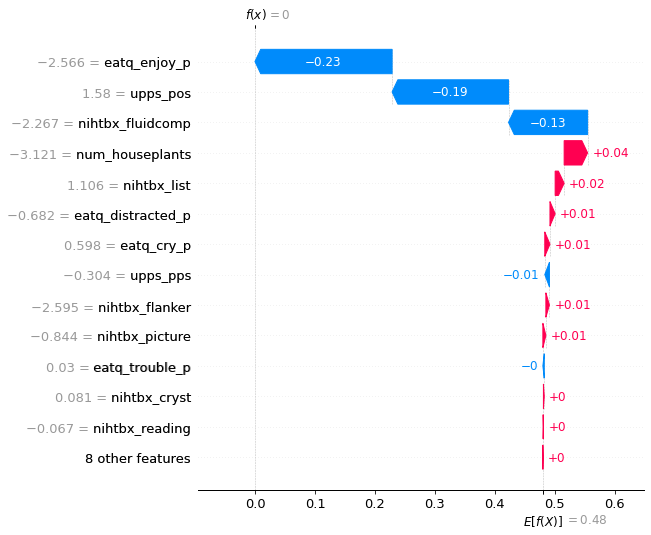

In [69]:

m_inds = np.where(tr_x['sex'] == 0)
#m_tr_x = tr_x[tr_x['sex'] == 0]
#m_inds = tr_x[tr_x['sex'] == 0].index#.tolist()
ind = m_inds[0][0]

print(ind)
shap.initjs()
shap.plots.waterfall(shap_values_ebm[ind], max_display=14)
#shap.plots.beeswarm(shap_values_ebm, max_display=14)
shap.plots.force(shap_values_ebm[ind])

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import KFold

n = 1000
outcome = np.random.choice([0, 1], n)
race_eth = np.random.choice(['asian', 'black', 'hispanic', 'other', 'white'], n, p = [.02, .15, .2, .1, .53])

kf = KFold(n_splits=10)
kf.get_n_splits(race_eth)

for train_index, test_index in kf.split(race_eth):
    
    print(np.unique(race_eth[train_index], return_counts = True))
    print(np.unique(race_eth[test_index], return_counts = True))
    
    
    # print("TRAIN:", train_index, "TEST:", test_index)
    # X_train, X_test = X[train_index], X[test_index]
    # y_train, y_test = y[train_index], y[test_index]



# np.unique(race_eth, return_counts = True)
#plt.hist(outcome)

17


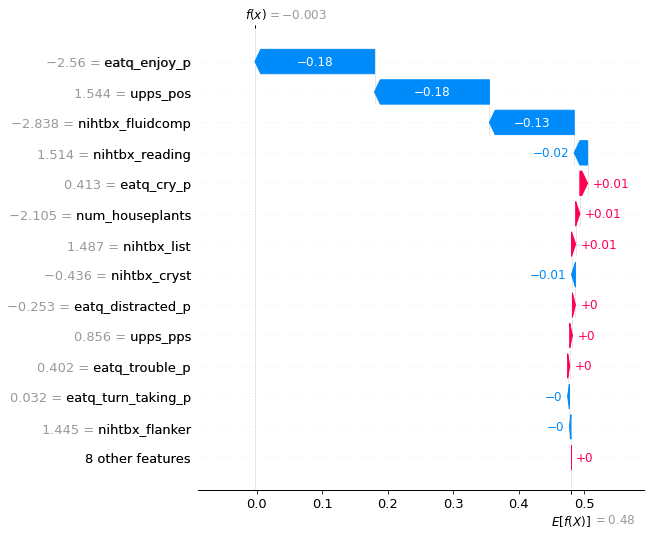

In [70]:

f_inds = np.where(tr_x['sex'] == 1)
#m_tr_x = tr_x[tr_x['sex'] == 0]
#m_inds = tr_x[tr_x['sex'] == 0].index#.tolist()
ind = f_inds[0][0]
print(ind)
shap.initjs()
shap.plots.waterfall(shap_values_ebm[ind], max_display=14)
#shap.plots.beeswarm(shap_values_ebm, max_display=14)
shap.plots.force(shap_values_ebm[ind])

In [169]:

# Number of males/females in our dataset
m_n = 10000
f_n = 2000

# Store performance
tr_acc, te_acc = [], []
m_te_acc, f_te_acc = [], []

# Train a couple times (synthetic data performance can vary)

for ii in tqdm(range(10)):
    
    # Generate data
    dat = fx.Create_MDD(m_n, f_n)
    X, y = dat.X, dat.y

    # Create splits
    kf = KFold(n_splits=5)
    
    # Train/eval for each fold
    for tr_idx, te_idx in kf.split(y):
        ret = train_model(X, y, tr_idx, te_idx)
        tr_acc.append(ret[0])
        te_acc.append(ret[1])
        m_te_acc.append(ret[2])
        f_te_acc.append(ret[3])

print(f'Train Acc: {np.mean(np.array(tr_acc)):.3f} '
      f'Test Acc: {np.mean(np.array(te_acc)):.3f} '
      f'Test Acc Male: {np.mean(np.array(m_te_acc)):.3f} '
      f'Test Acc Female: {np.mean(np.array(f_te_acc)):.3f}')


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:03<00:00,  3.08it/s]

Train Acc: 0.948 Test Acc: 0.948 Test Acc Male: 0.966 Test Acc Female: 0.910
